**KNN**



In [ ]:
# ==============================================
# Step 1: Import required libraries
# ==============================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# ==============================================
# Step 2: Load the dataset
# ==============================================
df = pd.read_csv("medical_students_dataset.csv")

df.head()
#df2=df.copy() To copy from dataframe to another

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [ ]:
df.describe(include='object')

,Gender,Blood Type,Diabetes,Smoking
count,180000,180000,180000,180000
unique,2,4,2,2
top,Male,B,No,No
freq,90005,45537,161986,143971


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(columns=['Student ID'], inplace=True)

In [ ]:
df = df.dropna(subset=['Smoking'], axis=0)

In [ ]:
df

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
1,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


/tmp/ipython-input-940692886.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Smoking', palette='viridis')


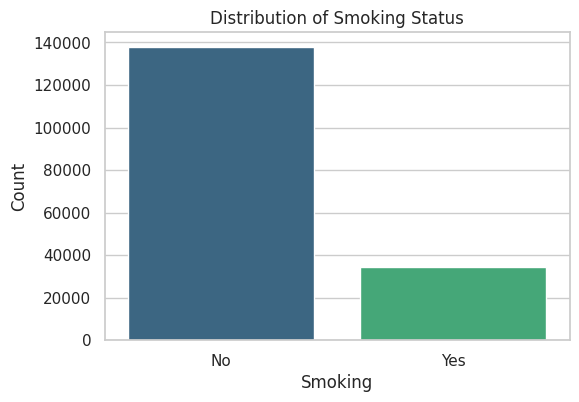

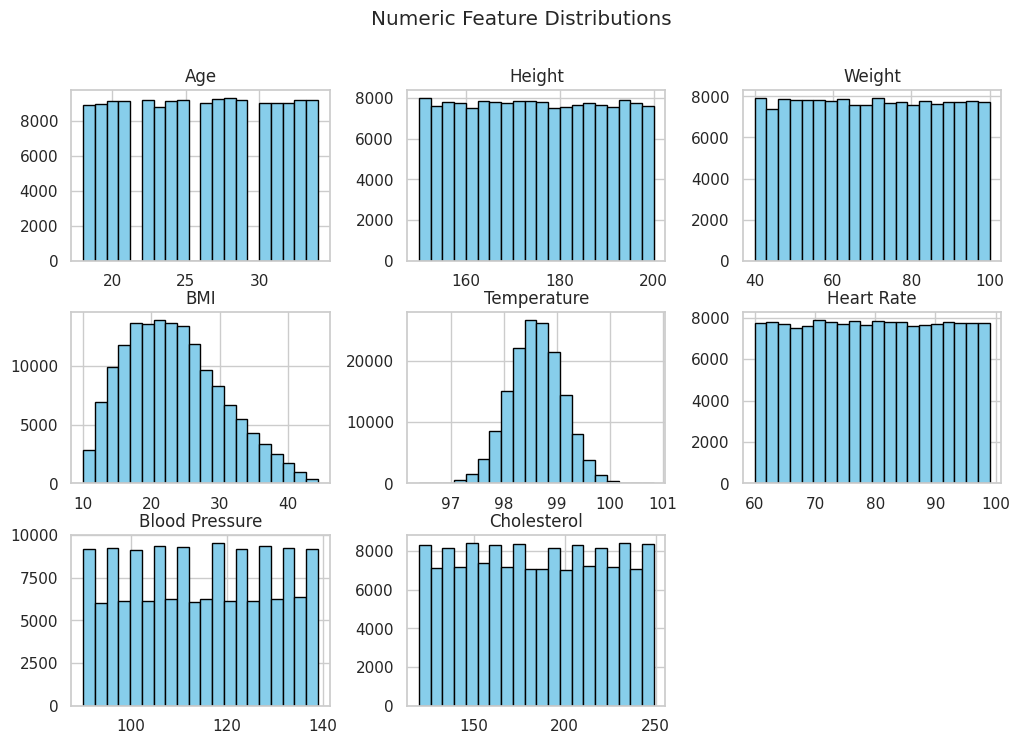

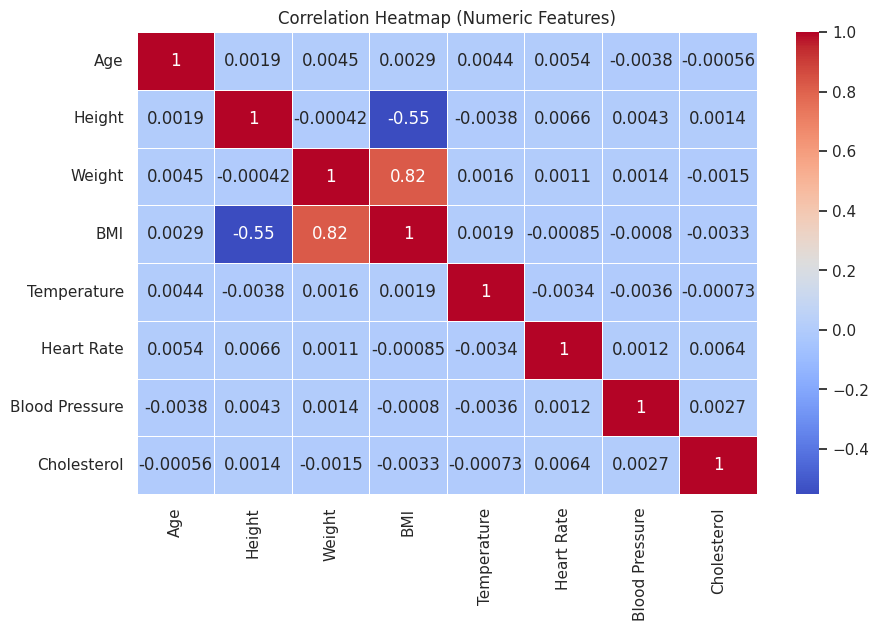

/tmp/ipython-input-940692886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')


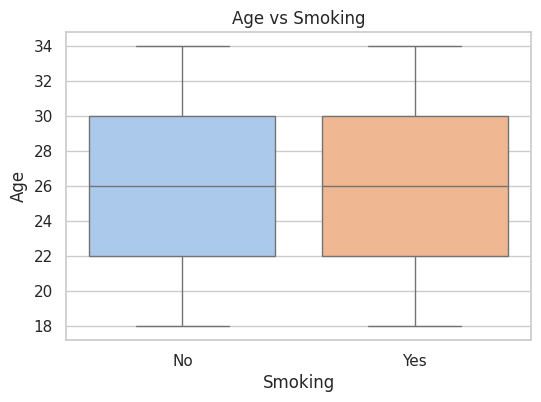

/tmp/ipython-input-940692886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')


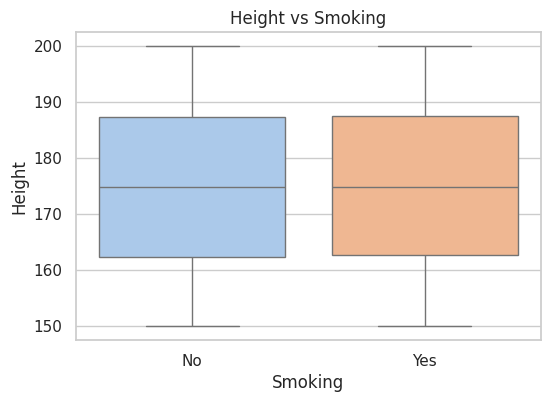

/tmp/ipython-input-940692886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')


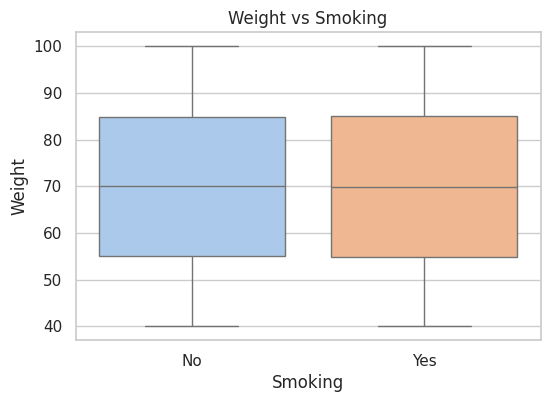

/tmp/ipython-input-940692886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')


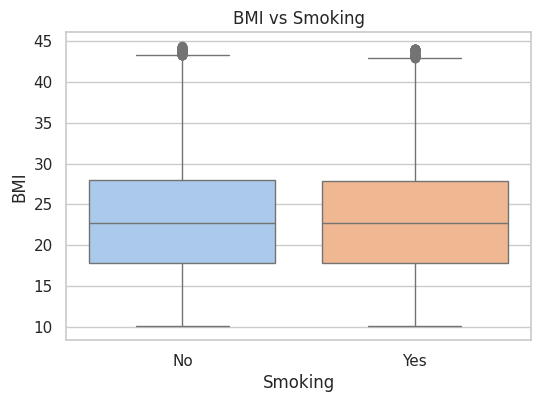

/tmp/ipython-input-940692886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')


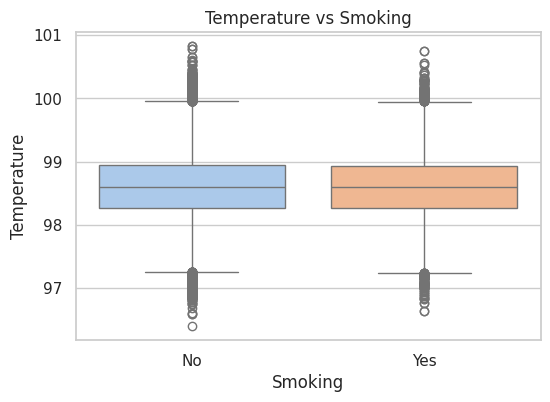

/tmp/ipython-input-940692886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')


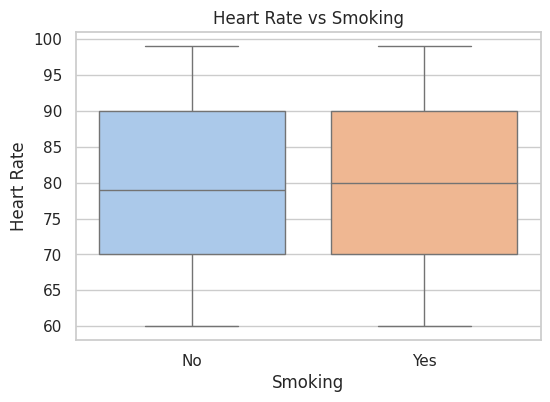

/tmp/ipython-input-940692886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')


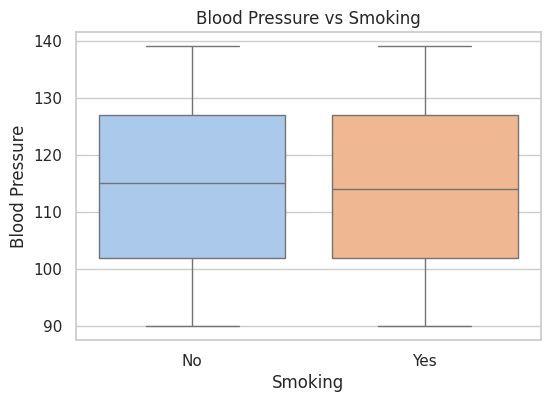

/tmp/ipython-input-940692886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')


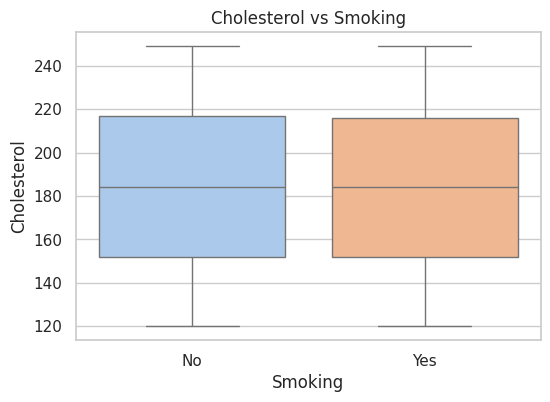

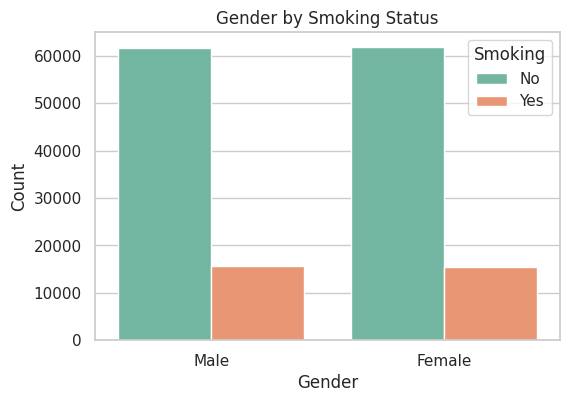

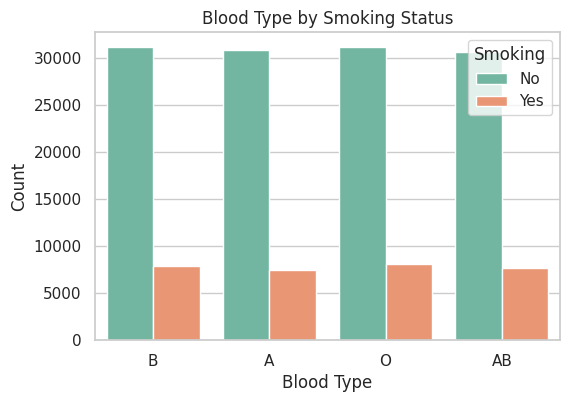

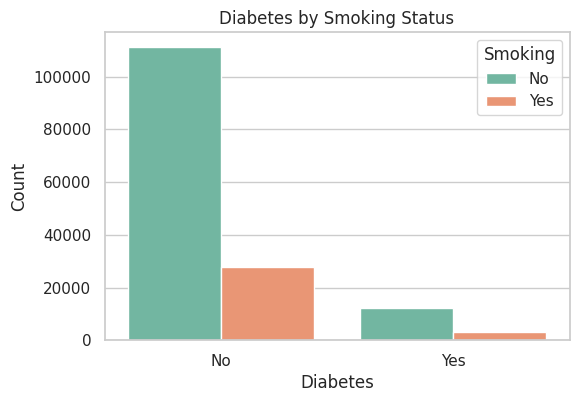

In [ ]:
# ==============================================
# Exploratory Data Analysis (EDA)
# ==============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set(style="whitegrid")


# 2. Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Smoking', palette='viridis')
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

# 3. Check numeric features distribution
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Numeric Feature Distributions')
plt.show()

# 4. Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# 5. Relationship between numeric features and Smoking
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Smoking', y=col, palette='pastel')
    plt.title(f'{col} vs Smoking')
    plt.show()

# 6. Count plots for categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    if col != 'Smoking':  # Exclude target variable
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue='Smoking', palette='Set2')
        plt.title(f'{col} by Smoking Status')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Smoking')
        plt.show()


In [ ]:
# Check for Nulls
df.isnull().sum()

,0
Age,19892
Gender,19924
Height,19907
Weight,19901
Blood Type,19916
BMI,19900
Temperature,19911
Heart Rate,19903
Blood Pressure,19892
Cholesterol,19893


In [ ]:
# Step 4: Handle missing values
# ==============================================
# For numeric columns → fill with the mean value
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
df[numeric_cols].isnull().sum()

,0
Age,0
Height,0
Weight,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0
Cholesterol,0


In [ ]:
# For categorical columns → fill with the most frequent (mode) value
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df[categorical_cols].isnull().sum()

,0
Gender,0
Blood Type,0
Diabetes,0
Smoking,0


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
Blood Type,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0
Cholesterol,0


In [ ]:
df

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.000000,Female,161.777924,72.354947,O,27.645835,98.601117,95.0,109.000000,203.0,No,No
1,26.022254,Male,152.069157,47.630941,B,23.338982,98.714977,93.0,104.000000,163.0,No,No
2,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,23.000000,Female,174.958363,46.234173,O,23.338982,98.480008,95.0,114.564761,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,24.000000,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.000000,130.0,No,No
199996,29.000000,Female,163.917675,45.225194,O,16.831734,97.865785,62.0,125.000000,198.0,No,Yes
199997,34.000000,Female,174.958363,99.648914,O,33.189303,98.768210,60.0,90.000000,154.0,No,No
199998,30.000000,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.000000,225.0,No,No


In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_df = ohe.fit_transform(df[categorical_cols])

In [ ]:
# Combine numeric and encoded columns
 Data = pd.concat([df[numeric_cols].reset_index(drop=True),
                     encoded_df.reset_index(drop=True)], axis=1)

In [ ]:
Data.shape

(192356, 18)

In [ ]:
df.shape

(192356, 12)

In [ ]:
Data.head()

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender_Female,Gender_Male,Blood Type_A,Blood Type_AB,Blood Type_B,Blood Type_O,Diabetes_No,Diabetes_Yes,Smoking_No,Smoking_Yes
0,18.000000,161.777924,72.354947,27.645835,98.601117,95.0,109.000000,203.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,26.022254,152.069157,47.630941,23.338982,98.714977,93.0,104.000000,163.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,32.000000,182.537664,55.741083,16.729017,98.260293,76.0,130.000000,216.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,30.000000,182.112867,63.332207,19.096042,98.839605,99.0,112.000000,141.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,23.000000,174.958363,46.234173,23.338982,98.480008,95.0,114.564761,231.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.000000,Female,161.777924,72.354947,O,27.645835,98.601117,95.0,109.000000,203.0,No,No
1,26.022254,Male,152.069157,47.630941,B,23.338982,98.714977,93.0,104.000000,163.0,No,No
2,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,23.000000,Female,174.958363,46.234173,O,23.338982,98.480008,95.0,114.564761,231.0,No,No


In [ ]:
y=df['Smoking']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    Data, y, test_size=0.2, random_state=42
)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%\n")

Model Accuracy: 81.74 %



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.98      0.90     31648
         Yes       0.40      0.06      0.11      6824

    accuracy                           0.82     38472
   macro avg       0.62      0.52      0.50     38472
weighted avg       0.75      0.82      0.76     38472



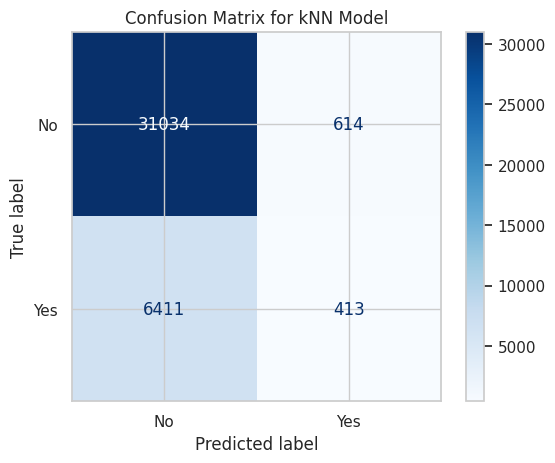

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for kNN Model")
plt.show()


In [ ]:
"""We can see through the confusion matrix that a huge miss-classification
    That's due to class Imbalance problem so the model is biased into class 'No'
    We will discuss how to solve this later"""

In [ ]:
# Accuracy on training data
train_accuracy = knn.score(X_train, y_train)

# Accuracy on test data
test_accuracy = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy:  {test_accuracy:.3f}")


Training Accuracy: 0.847
Testing Accuracy:  0.817
